# Calculate and Plot Activity


Given an existing database for Al-Zn, we would like to calculate the activity of the liquid.

## Experimental activity results

In order to make sure we are correct, we'll compare the values with experimental results.
Experimental activities are digtized from Fig 18 in A. Yazawa, Y.K. Lee, Thermodynamic Studies of the Liquid Aluminum Alloy Systems, Trans. Japan Inst. Met. 11 (1970) 411–418. https://doi.org/10.2320/matertrans1960.11.411.

The measurements are at 1073 K and they used a reference state of the pure Zn at that temperature.


In [1]:
exp_x_zn =   [0.0482, 0.1990, 0.3550, 0.5045, 0.6549, 0.8070, 0.9569]
exp_acr_zn = [0.1154, 0.3765, 0.5411, 0.6433, 0.7352, 0.8384, 0.9531]

## Set up the database

Al-Zn database is taken from S. Mey, Reevaluation of the Al-Zn system, Zeitschrift F{ü}r Met. 84 (1993) 451–455.

In [2]:
from pycalphad import Database, equilibrium, variables as v
import numpy as np

dbf = Database('alzn_mey.tdb') 

comps = ['AL', 'ZN', 'VA']
phases = list(dbf.phases.keys())

temp = 1073

## Calculate the reference state

Because all chemical activities must be specified with a reference state, we're going to choose a reference state as the pure element at the same temperature, consistent with the experimental data.

In [3]:
ref_eq = equilibrium(dbf, comps, phases, {v.P: 101325, v.T: temp, v.X('ZN'): 1})

## Calculate the equilibria

Do the calculation over the composition range

In [4]:
eq = equilibrium(dbf, comps, phases, {v.P: 101325, v.T: temp, v.X('ZN'): (0, 1, 0.005)})

## Get the chemical potentials and calculate activity

We need to select the chemical potentials from the xarray Dataset and calculate the activity.

In [5]:
chempot_ref = ref_eq.MU.sel(component='ZN').squeeze()
chempot = eq.MU.sel(component='ZN').squeeze()

acr_zn = np.exp((chempot - chempot_ref)/(8.315*temp))

## Plot the result

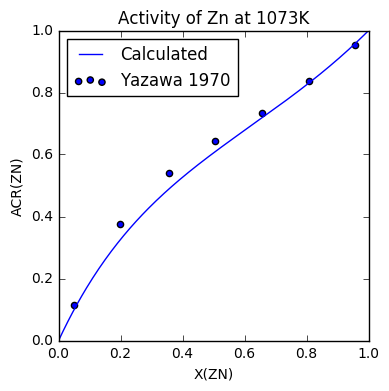

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(eq.X.sel(component='ZN', vertex=0).squeeze(), acr_zn, label='Calculated')
# add experimental data
plt.scatter(exp_x_zn, exp_acr_zn, label='Yazawa 1970')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect(1)
plt.xlabel('X(ZN)')
plt.ylabel('ACR(ZN)')
plt.title('Activity of Zn at {0}K'.format(temp))
plt.legend(loc=0)